In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd 
import numpy as nm  
import matplotlib.pyplot as mtp  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  

**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df1=df.drop(['User ID','Gender'],axis=1)
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [5]:
x=df1[['Age','EstimatedSalary']].values
y=df1['Purchased'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [6]:
scaling=StandardScaler()
scaling.fit_transform(x_train,x_test)

array([[ 0.03822119,  1.25906542],
       [ 1.50173349, -1.26914466],
       [-0.96794351,  0.612314  ],
       [ 0.95291638,  0.612314  ],
       [ 0.40409927, -0.44600649],
       [ 1.0443859 , -0.12263079],
       [-0.23618736, -0.56359766],
       [-0.23618736, -1.23974687],
       [ 0.86144686, -0.56359766],
       [ 1.95908108,  0.40652946],
       [-0.4191264 ,  2.3467837 ],
       [-1.51676063,  0.55351842],
       [ 0.67850782, -0.71058662],
       [-0.23618736, -1.38673583],
       [ 0.40409927, -0.47540429],
       [ 0.95291638,  2.023408  ],
       [-1.05941303,  0.31833609],
       [-0.32765688,  1.34725879],
       [-0.96794351,  0.78870075],
       [ 2.0505506 , -0.79877999],
       [ 0.31262975,  0.28893829],
       [ 0.12969071,  1.08267867],
       [-0.78500448, -1.21034908],
       [-1.79116918, -0.50480208],
       [ 0.5870383 , -0.88697337],
       [ 1.22732493,  2.25859033],
       [-0.60206544, -1.50432699],
       [-1.33382159, -0.62239324],
       [ 0.03822119,

**Fitting Decision Tree Classification to the Training set**

In [7]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [8]:
y_pred= classifier.predict(x_test)  

**Making the Confusion Matrix**

In [13]:
cm= confusion_matrix(y_test, y_pred)
cm  

array([[67,  7],
       [14, 32]])

**Visualising the Training set results**

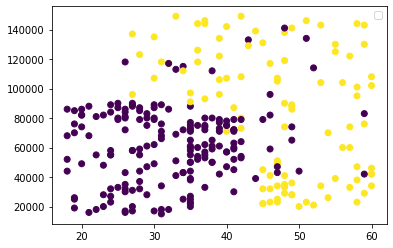

In [10]:
mtp.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
mtp.legend()
mtp.show()


**Visualising the Test set results**

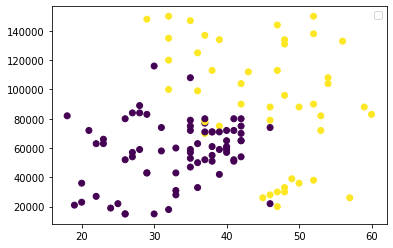

In [11]:
mtp.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
mtp.legend()
mtp.show()


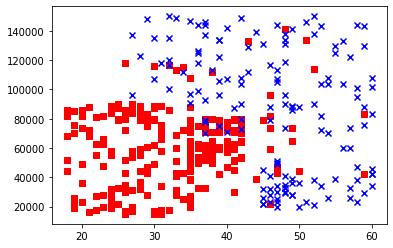

In [12]:
from matplotlib.colors import ListedColormap
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(nm.unique(y_test))])
for idx, cl in enumerate(nm.unique(y)):
    mtp.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)